In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'1.14.0'

In [3]:
mnist = tf.keras.datasets.mnist # 28x28 images of hand written digits 0-9 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

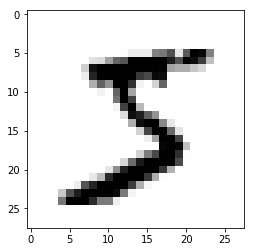

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(x_train[0])

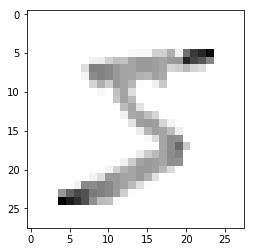

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
# Normalize values
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(x_train[0])

In [30]:
# Build the model
model = tf.keras.models.Sequential()
# Add hidden layear (flatten(we do not want 28X28 - we want flag) and Dense (128 neurons, rely activation function)
# and output layer with 10 numbers and activation function softmax for probability distribution)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Paramaters for the model 
# loss - loss function to optimize 
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2611 - acc: 0.9233
Epoch 2/3
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1068 - acc: 0.9667
Epoch 3/3
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0726 - acc: 0.9765


In [31]:
# Calculate validation loss and validation accuracy 
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.0944 - acc: 0.9720
0.09435686213653535 0.972


In [32]:
# Save model
model.save('epic_num_reader.model')
# Apply model
new_model = tf.keras.models.load_model('epic_num_reader.model')

W0730 13:45:20.564268  8604 hdf5_format.py:263] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a freshly initialized optimizer.


In [33]:
predictions = new_model.predict(x_test)

In [34]:
print(predictions)

[[3.0456840e-10 7.3880621e-08 3.1265560e-07 ... 9.9999535e-01
  1.1745770e-09 8.5708081e-08]
 [1.0215151e-10 6.1356765e-04 9.9853837e-01 ... 1.3534290e-07
  3.4044612e-07 3.5674137e-12]
 [4.7906603e-09 9.9990416e-01 1.4515845e-05 ... 2.9771829e-05
  2.9109358e-05 4.2097065e-07]
 ...
 [7.5502288e-10 3.2695768e-09 4.5831722e-08 ... 4.8716206e-06
  4.0164241e-07 1.0606758e-05]
 [7.0096896e-05 7.1900954e-06 9.4209707e-07 ... 3.2662169e-06
  9.5232362e-03 1.3733901e-06]
 [2.3318604e-08 8.8069157e-08 5.4408019e-07 ... 2.5473639e-11
  1.2535469e-08 7.2517592e-10]]


In [35]:
# make predictions in normal way 
import numpy as np
print(np.argmax(predictions[121]))

4


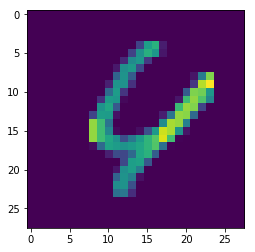

In [36]:
plt.imshow(x_test[121])
plt.show()